In [89]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\user\\Downloads\\income.csv")
df.drop(columns="Unnamed: 3",inplace=True)
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


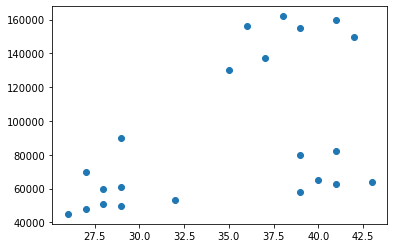

In [90]:
plt.scatter(df['Age'],df['Income($)'])

In [91]:
# Here we can see 3 cluster points, so k=3.

In [92]:
from sklearn.cluster import KMeans

In [93]:
km=KMeans(n_clusters=3)

In [94]:
y_pred=km.fit_predict(df[["Age","Income($)"]])
y_pred  

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [95]:
#here also 3 type of clusters as same as graph

In [96]:
df['cluster']=y_pred
df  #it is mixed with all clusters

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [97]:
df1=df[df.cluster==0]
df1 #cloumn of 0 th cluster

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


In [98]:
df2=df[df.cluster==1]
df2 #cluser 1

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
19,Alia,39,80000,1
20,Sid,41,82000,1


In [99]:
df3=df[df.cluster==2]
df3    #cluster 2

,Name,Age,Income($),cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


Text(0, 0.5, 'income')

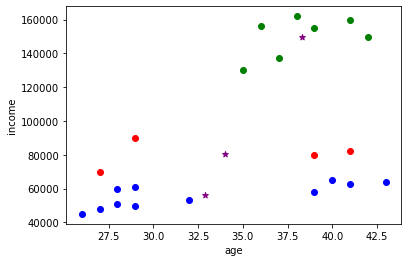

In [100]:
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid") #cluster center
plt.xlabel("age")
plt.ylabel("income")

In [101]:
km.cluster_centers_    #to get cluster centroids

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [102]:
# there are some outlier(mixing up) in clusters,to avoid this we us scaling data with minmaxscaler since we are using for a column, if whole data have difference we have to use normalisation

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler=MinMaxScaler()

In [105]:
scaler.fit(df[["Income($)"]])

MinMaxScaler()

In [106]:
df["Income($)"]=scaler.transform(df[['Income($)']])

In [107]:
scaler.fit(df[["Age"]])

MinMaxScaler()

In [108]:
df["Age"]=scaler.transform(df[["Age"]])

In [109]:
y_pred=km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [110]:
df["cluster"]=y_pred
df   #updated cluster with all 3 cluster

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [111]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

Text(0, 0.5, 'income')

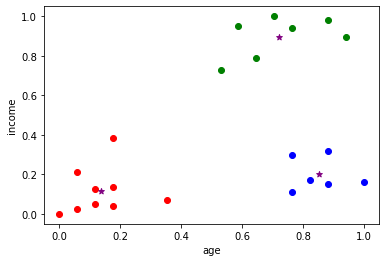

In [112]:
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="blue")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("age")
plt.ylabel("income")

In [113]:
#now no outliers(mixing up) in clusters

In [114]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [115]:
# K-Means can be used for recommendation system or grouping purpose
#recommending top 5 movies to watch